In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("data.csv")

In [3]:
dataset.shape

(169909, 19)

In [4]:
dataset.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [5]:
dataset

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [6]:
import matplotlib.pyplot as plt

In [7]:
dataset.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

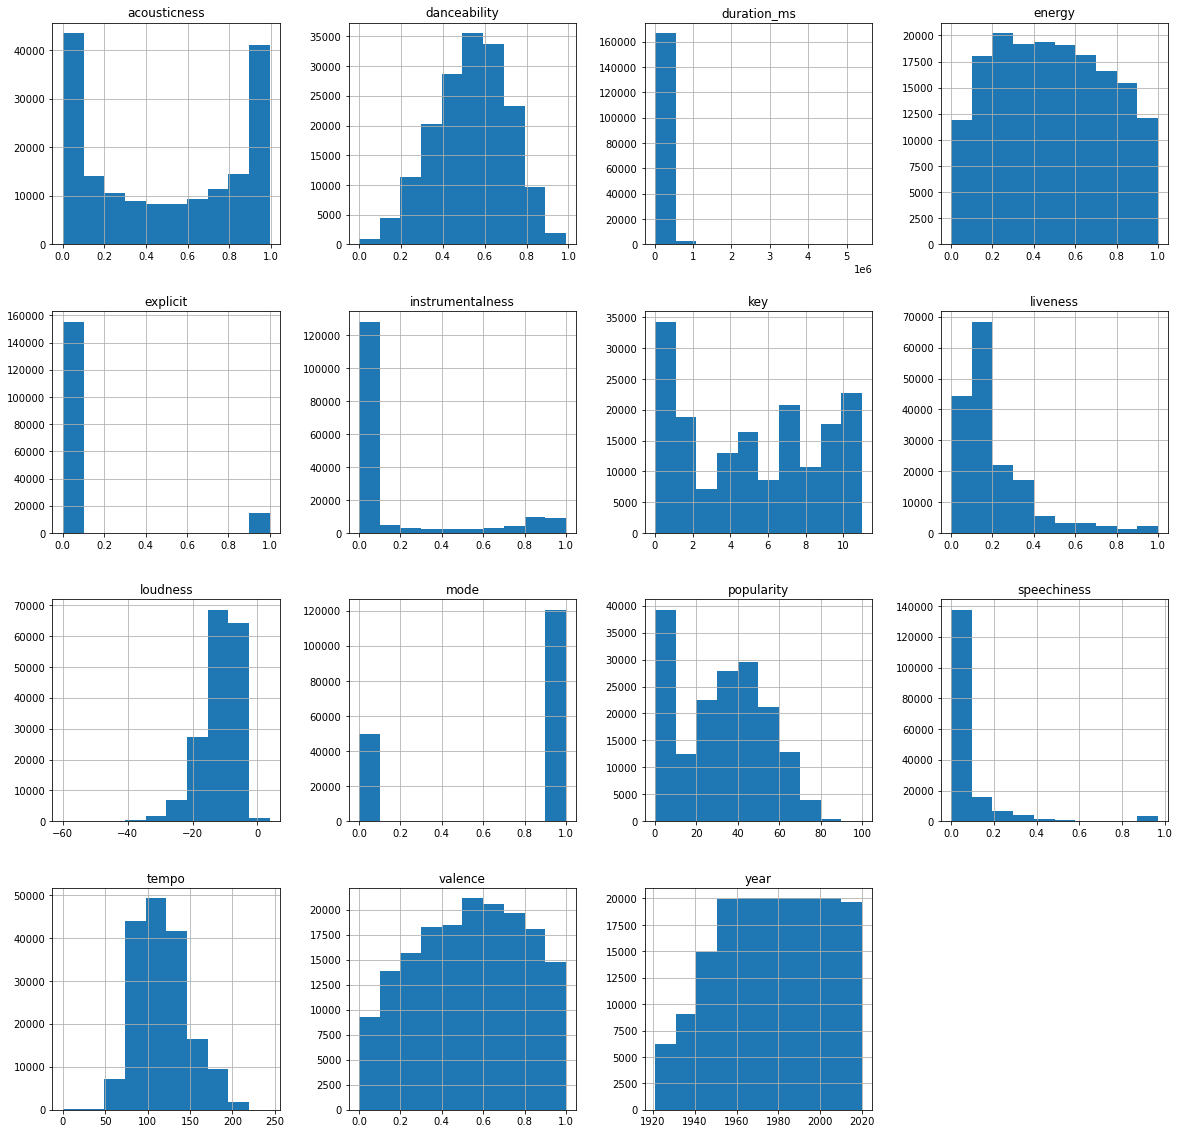

In [8]:
dataset.hist(figsize=(20, 20))
plt.show()

In [9]:
import seaborn as sns

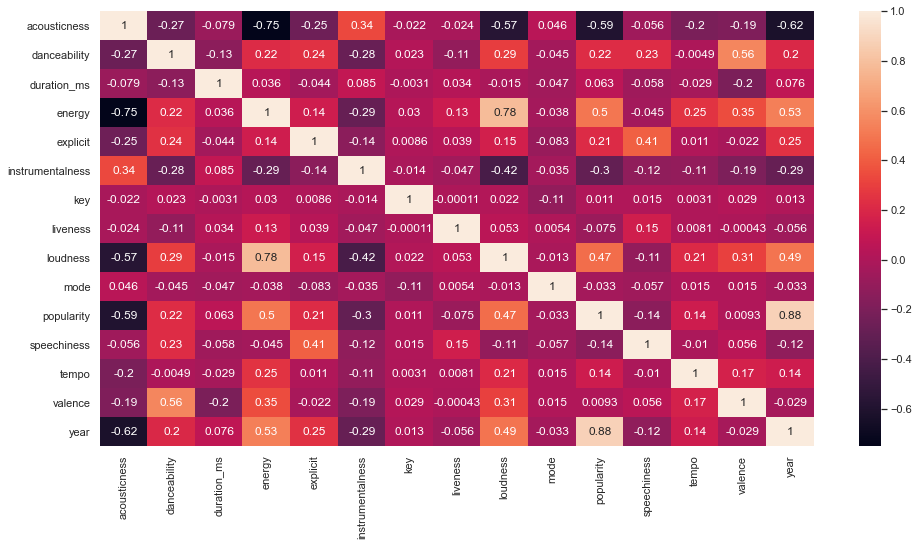

In [10]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = dataset.corr()
sns.heatmap(corr,annot=True)

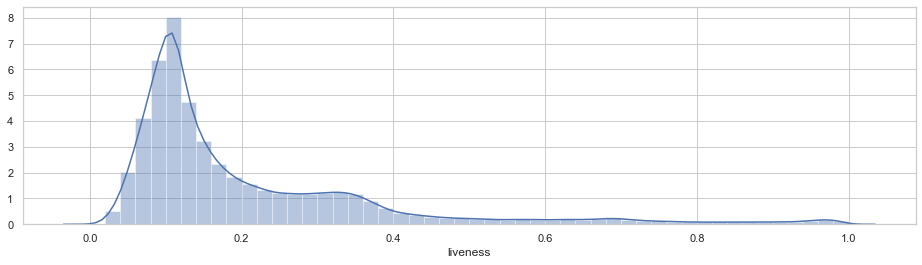

In [11]:
plt.figure(figsize=(16, 4))
sns.distplot(dataset["liveness"])

<Figure size 1152x576 with 0 Axes>

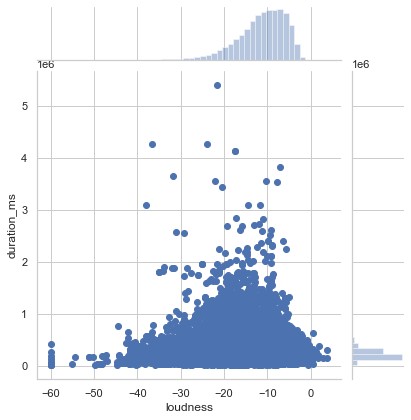

In [12]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=dataset['loudness'],y=dataset["duration_ms"],data=dataset)

In [14]:
import lyricsgenius
genius = lyricsgenius.Genius('a0pGPKAxxuBom9BZEM6YQ4wrGaKAlnPYoWPTTXFe0t4wtJgHzx_1xGorgDcYL-9e')

In [16]:
artist = genius.search_artist("Robert Schumann", max_songs=3, sort="title", include_features=True)
print(artist.songs)

Searching for songs by Robert Schumann...

Song 1: "Abegg Variations, Op. 1"
Couldn't find the lyrics section.
Song 2: "Album For The Young Op.68/10 - The Merry Peasant"
Couldn't find the lyrics section.
Song 3: "Album Fur Die Jugend, Op. 68: Schecherzade"

Reached user-specified song limit (3).
Done. Found 3 songs.
[('Abegg Variations, Op. 1', 'Robert Schumann'), ('Album For The Young Op.68/10 - The Merry Peasant', 'Robert Schumann'), ('Album Fur Die Jugend, Op. 68: Schecherzade', 'Robert Schumann')]


In [17]:
df = dataset.head(200)

In [18]:
Lyrics = []
count = 0
for i, row in df.iterrows():
  song = genius.search_song(row['name'])
  if song is not None:
    Lyrics.append(song.lyrics.replace('\n', ' ')) 
    count = count + 1
  else:
    Lyrics.append('')

Searching for "Singende Bataillone 1. Teil"...
Done.
Searching for "Fantasiestücke, Op. 111: Più tosto lento"...
No results found for: 'Fantasiestücke, Op. 111: Più tosto lento'
Searching for "Chapter 1.18 - Zamek kaniowski"...
No results found for: 'Chapter 1.18 - Zamek kaniowski'
Searching for "Bebamos Juntos - Instrumental (Remasterizado)"...
No results found for: 'Bebamos Juntos - Instrumental (Remasterizado)'
Searching for "Polonaise-Fantaisie in A-Flat Major, Op. 61"...
Couldn't find the lyrics section.
Specified song does not have a valid URL with lyrics.Rejecting.
Searching for "Scherzo a capriccio: Presto"...
Done.
Searching for "Valse oubliée No. 1 in F-Sharp Major, S. 215/1"...
No results found for: 'Valse oubliée No. 1 in F-Sharp Major, S. 215/1'
Searching for "Per aspera ad astra"...
Done.
Searching for "Moneda Corriente - Remasterizado"...
No results found for: 'Moneda Corriente - Remasterizado'
Searching for "Chapter 1.3 - Zamek kaniowski"...
No results found for: 'Chapt

Couldn't find the lyrics section.
Specified song does not have a valid URL with lyrics.Rejecting.
Searching for "Sonata No. 3, Op. 14: III: Variation II"...
No results found for: 'Sonata No. 3, Op. 14: III: Variation II'
Searching for "Reaching for Someone (And Not Finding Anyone There)"...
Done.
Searching for "Midnight Hour Blues"...
Done.
Searching for "Polonaise-Fantaisie in A-Flat Major, Op. 61"...
Done.
Searching for "Nocturne in C-Sharp Minor, Op. 27, No. 1 - 2001 Remastered"...
No results found for: 'Nocturne in C-Sharp Minor, Op. 27, No. 1 - 2001 Remastered'
Searching for "Preludes: Op. 59, No. 2"...
Done.
Searching for "Sonata No. 3, Op. 46: I. Allegro con moto"...
No results found for: 'Sonata No. 3, Op. 46: I. Allegro con moto'
Searching for "Chapter 3.14 - Zamek kaniowski"...
No results found for: 'Chapter 3.14 - Zamek kaniowski'
Searching for "¿Te Acuerdas Mamita? - Instrumental (Remasterizado)"...
No results found for: '¿Te Acuerdas Mamita? - Instrumental (Remasterizado)'

Done.
Searching for "Dio Maura Matia"...
Done.
Searching for "Μου έδωσες την καρδούλα σου"...
Done.
Searching for "Ο μετανάστης"...
Done.
Searching for "Glukeia Retzina"...
No results found for: 'Glukeia Retzina'
Searching for "To Marikaki"...
Done.
Searching for "Fandanguillo"...
Done.
Searching for "El Pingo de Pascual - Remasterizado"...
No results found for: 'El Pingo de Pascual - Remasterizado'
Searching for "Que Bello Es Soñar - Remasterizado"...
No results found for: 'Que Bello Es Soñar - Remasterizado'
Searching for "Schochney botey chomer"...
No results found for: 'Schochney botey chomer'


In [19]:
df['Lyrics'] = Lyrics

<ipython-input-19-48241bcb75ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lyrics'] = Lyrics


In [20]:
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Lyrics
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,"God said to Nietzsche: That’ll Tietzsche, You ..."
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.988,['Roza Eskenazi'],0.475,201173,0.4450,0,4KZAdHeZ2uqhrzFIQW9IE2,0.019100,6,0.3660,-11.115,1,To Marikaki,0,1930-01-01,0.0420,80.644,0.7960,1930,Masz to co ja chcę Mam to co Ty chcesz Masz to...
196,0.981,"['Federico Moreno Torroba', 'Vicente Gomez', '...",0.533,159896,0.2050,0,4KgutHaYymtSF07o1ezYkf,0.943000,3,0.1070,-18.888,0,Fandanguillo,0,1930-01-01,0.0676,114.557,0.7120,1930,Instrumental
197,0.984,"['Francisco Canaro', 'Charlo']",0.852,181987,0.3750,0,4KnjJgdiSy5k7aapXGJyov,0.100000,2,0.2460,-6.287,1,El Pingo de Pascual - Remasterizado,0,1930-12-05,0.1350,117.141,0.8910,1930,
198,0.989,"['Francisco Canaro', 'Charlo']",0.439,192000,0.0716,0,4KuFgXbahxEILwg8qu1kKG,0.000014,7,0.1220,-19.899,1,Que Bello Es Soñar - Remasterizado,0,1930-11-12,0.0753,77.081,0.2300,1930,


In [21]:
df.to_csv('WithLyrics.csv')